<h1><center>

</center></h1>
<font size="6"><center>
EIE 401
PROCESAMIENTO DIGITAL MULTIMEDIA 
</center></font>


<center><h2>Actividad 5</h2></center>
<center><h3>Audio</h3></center>
<center><h3>Profesor: Jorge Cardenas</h3></center>

<center><h3>Por: Javier González Paredes</h3></center>
<center><h5>Pontificia Universidad Catolica de Valparaiso</h5></center>
 

## 1. Aplique la transformada rápida de fourier a una señal de audio
<p align="justify">
El archivo de audio debe ser formato .WAV, con menos de 30 segundo de duración.


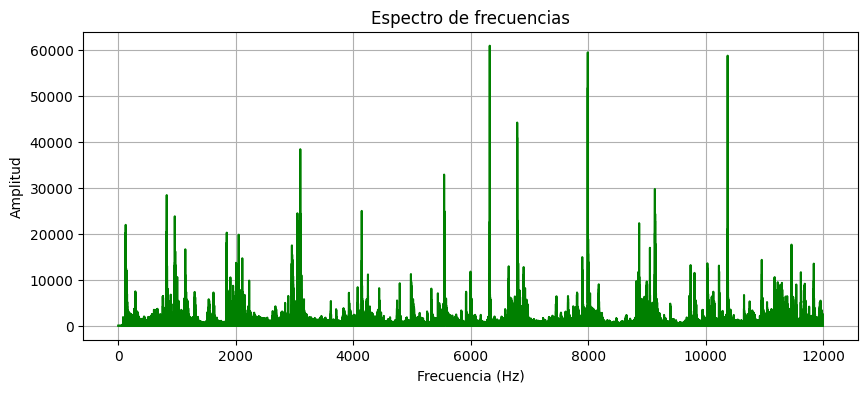

In [20]:
import numpy as np
from scipy.io import wavfile
import matplotlib.pyplot as plt

# Cargar el archivo de audio
sample_rate, data = wavfile.read("audio.wav")

# Obtener la duración del audio y el número de muestras
duration = len(data) / sample_rate
num_samples = len(data)

# Calcular la transformada de Fourier
fft_output = np.fft.fft(data)
frequencies = np.fft.fftfreq(num_samples, 1 / sample_rate)

# Tomar solo las frecuencias positivas
positive_frequencies = frequencies[:num_samples // 2]
positive_fft_output = np.abs(fft_output[:num_samples // 2])

# Graficar el espectro de frecuencias
plt.figure(figsize=(10, 4))
plt.plot(positive_frequencies, positive_fft_output, color = "green")
plt.title('Espectro de frecuencias')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Amplitud')
plt.grid(True)
plt.show()


## 2. Obtén el espectrograma de tu señal de audio

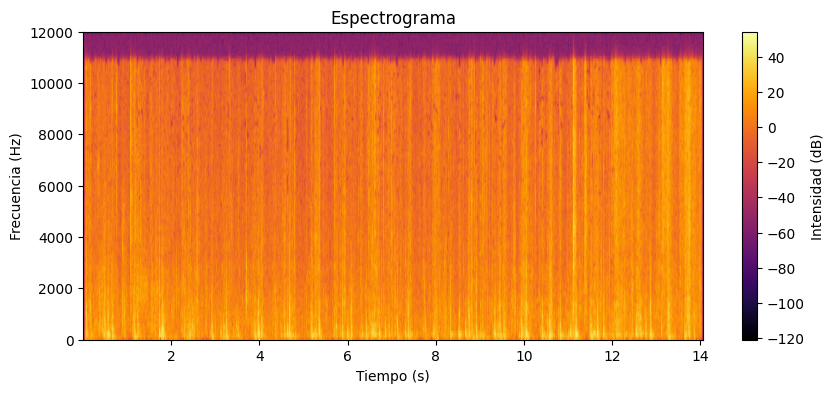

In [21]:
# Tomar solo un canal si el audio tiene múltiples canales
if len(data.shape) > 1:
    data = data[:, 0]  # Tomar solo el primer canal

# Obtener el espectrograma
plt.figure(figsize=(10, 4))
plt.specgram(data, Fs=sample_rate, cmap='inferno')
plt.title('Espectrograma')
plt.xlabel('Tiempo (s)')
plt.ylabel('Frecuencia (Hz)')
plt.colorbar(label='Intensidad (dB)')
plt.show()

## 3. Slicing
Desarrolla un framento de código que te permita tomar una señal de audio y framentarla en N segmentos o slices. Debe asignar la longitud temporal de cada slice y el programa debe indicar el número de slices que quedan. Considera que al final puede quedar un slice de longitud diferente a todos los demas.

En el slicing debes también incluir un gap o overlap a lado y lado de cada uno de los fragmentos. Este overlap debe ser ajustable del número de muestras que constituyen dicho overlap.

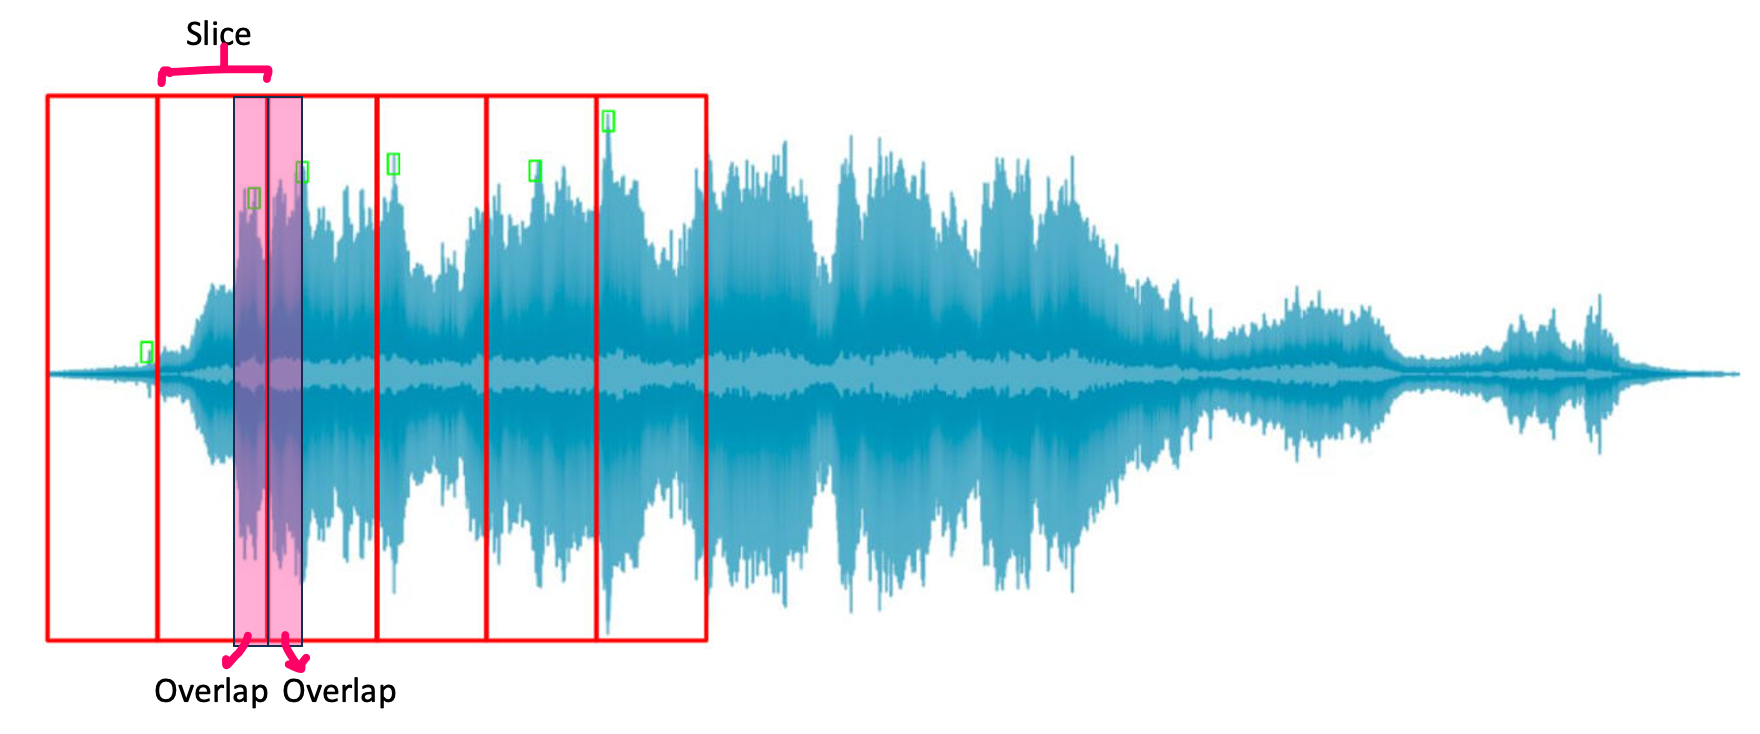

In [22]:
import numpy as np
from scipy.io import wavfile

def slice_audio(audio, sample_rate, slice_length_sec, overlap_samples):
    # Calcula el número total de muestras para la longitud del slice
    slice_length_samples = int(slice_length_sec * sample_rate)
    # Calcula el número de muestras de solapamiento
    overlap_length_samples = int(overlap_samples)
    # Calcula el número total de slices
    num_slices = (len(audio) - slice_length_samples) // (slice_length_samples - overlap_length_samples) + 1
    print("Número total de slices:", num_slices)

    # Lista para almacenar los fragmentos de audio
    sliced_audio = []

    # Fragmenta el audio en slices
    for i in range(num_slices):
        # Calcula el inicio y fin del slice actual
        start = i * (slice_length_samples - overlap_length_samples)
        end = start + slice_length_samples
        # Añade el slice actual a la lista
        sliced_audio.append(audio[start:end])

    return sliced_audio

# Cargar el archivo de audio
file_path = "audio.wav"
sample_rate, audio_data = wavfile.read(file_path)

# Parámetros del slicing
slice_length_sec = 5  # Longitud temporal de cada slice en segundos
overlap_sec = 1  # Solapamiento en segundos

# Calcula el número de muestras de solapamiento
overlap_samples = overlap_sec * sample_rate

# Realiza el slicing
slices = slice_audio(audio_data, sample_rate, slice_length_sec, overlap_samples)

# Muestra el número de slices resultantes
print("Número de slices generados:", len(slices))


Número total de slices: 3
Número de slices generados: 3


## 3.1 Slicing usando Pytorch de la señal obtenida en el primer punto.
Debes crear un array con los slices creados a partir de tensores en pytorch.
Grafica un par de tus slices y reproduce el audio.


## 4. Filtro Butterworth para una señal de audio.
Diseña y aplica un filtro butterworth a tu señal de audio.
Muestra un gráfico con la respuesta del filtro butterworth y explica el resultado.

## 4. Referencias
<p align="justify">
    
[Análisis espectral para audio] https://ccrma.stanford.edu/~jos/mdft/mdft-python.html

[Análisis espectral] https://currents.soest.hawaii.edu/ocn_data_analysis/_static/Spectrum.html
